In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,10-0.1,100)


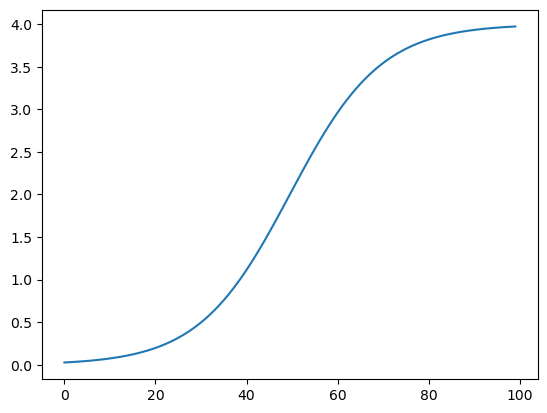

In [2]:
y=np.sin(x*2*np.pi*2/10)

y_sigmoid=4/(1+np.exp(-(x-np.mean(x))))
plt.plot(y_sigmoid)

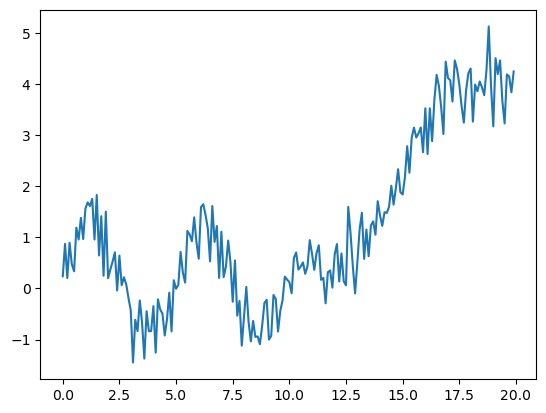

In [3]:
x=np.linspace(0,20-0.1,200)
y=np.concatenate([y,y_sigmoid])+np.random.normal(0.2, 0.4, 200)
plt.plot(x,y)

In [18]:
from changepy import peltWithCost
from changepy.costs import normal_mean,normal_meanvar
cp,seg_costs=peltWithCost(normal_mean(y,np.power(np.std(y),2)),len(y))

# cp,seg_costs=peltWithCost(normal_meanvar(y),len(y))




In [19]:
seg_costs


[nan, -3.0358546049661124]

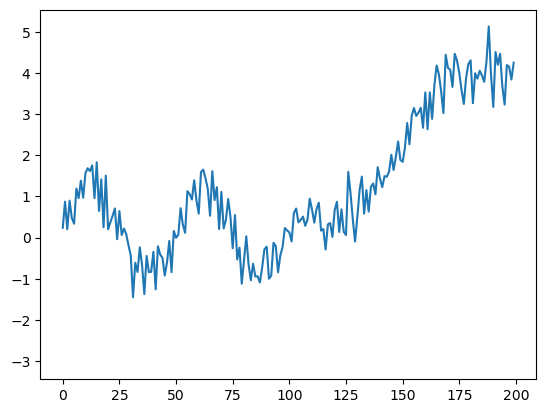

In [14]:
plt.plot(y)
plt.plot(cp,seg_costs)


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def pelt(data, **kwargs):
    
    # Pre-processing
    df = pd.DataFrame(data)
    df['squared'] = np.square(df[0])
    df['cumsum'] = np.cumsum(df[0], axis=0)
    df['cumsumsquared'] = np.cumsum(df['squared'], axis=0)
    df['diviseur'] = [x for x in range(1,len(df)+1)]
    df['mean'] = df['cumsum'] / df['diviseur']
    df['meansquared'] = np.square(df['mean'])
    df = df.append({
        0:0,
        'cumsum':0,
        'cumsumsquared':0,
        'diviseur':0,
        'mean':0,
        'meansquared':0,
        'squared':0}, ignore_index=True)
    
    # Penalty
    if 'penalty' in kwargs:
        B = kwargs['penalty']
    else:
        B = 2 * np.log(len(data))
    
    # Initilization
    Q = [-B] # Actual cost
    CP = [-1] # Last segment position
    T = [x for x in range(0,len(data))] # Authorized positions

    # Parse the data
    for pos in range(0,len(data)):
        
        costs = []
        min_cost_val_temp = float("inf")
        min_cost_pos_temp = -1
        
        # Parse all the Yi:pos that are still available
        for i in T:
            if i > pos:
                break

            # Square sum minus N times the square mean
            sos = df['cumsumsquared'].iloc[pos] - df['cumsumsquared'].iloc[i-1]
            n = pos - i + 1
            ms = (data[i:pos+1].mean())**2
            C = sos - (n*ms)

            # Cost test
            temp_cost = Q[i] + C + B
            if min_cost_val_temp > temp_cost:
                min_cost_val_temp = temp_cost
                min_cost_val_pos = i

        # Push the smallest cost
        Q.append(min_cost_val_temp)

        # Push the position
        CP.append(min_cost_val_pos)
        
        # Prunning
        for i in T:
            if i >= pos:
                break
            
            iplusone = i+1
            # Square sum minus N times the square mean
            sos = df['cumsumsquared'].iloc[pos] - df['cumsumsquared'].iloc[iplusone-1]
            n = pos - iplusone + 1
            ms = (data[iplusone:pos+1].mean())**2
            C = sos - (n*ms)
                
            if (Q[i] + C > Q[pos]):
                T.remove(i)
                
    return CP

def backtracking(CP):
    """ Apply backtracking to a CP vector from OP algorithm. Returns a "segments" vector.
    Args:
     CP: array-like 1 dimension.
    """

    # Data length
    n = len(CP)-1

    # Initialization
    segments = []
    changepoint = CP[n]

    # While the changepoint doesn't return the first point
    while changepoint > 0:

        segments.append(changepoint-1)
        changepoint = CP[changepoint]

    # The new vector was built with .append(), but since we parse from the end to the beginning,
    # We need to reverse it.
    segments.reverse()
    
    return segments

def plot_segments(data, segments, ylim=False):
    """ Plot segments generated by the OP & backtracking algorithms.
    Args:
        data: the data used to fit the model.
        segments: the segments returned by backtracking().
    """
    
    fig, ax = plt.subplots(figsize=(15,5))
    start = 0

    for end in segments:
        mean = data[start:end+1].sum() / len(data[start:end+1])
        plt.plot((start, end), (mean, mean))
        start = end+1

    end = len(data)-1
    mean = data[start:end+1].sum() / len(data[start:end+1])
    plt.plot((start, end), (mean, mean))
    
    if ylim != False:
        plt.ylim(ylim)
    plt.show()



In [36]:

# Pre-processing
data=y
df = pd.DataFrame(data)
df['squared'] = np.square(df[0])
df['cumsum'] = np.cumsum(df[0], axis=0)
df['cumsumsquared'] = np.cumsum(df['squared'], axis=0)
df['diviseur'] = [x for x in range(1,len(df)+1)]
df['mean'] = df['cumsum'] / df['diviseur']
df['meansquared'] = np.square(df['mean'])
df = df.append({
    0:0,
    'cumsum':0,
    'cumsumsquared':0,
    'diviseur':0,
    'mean':0,
    'meansquared':0,
    'squared':0}, ignore_index=True)

# # Penalty
# if 'penalty' in kwargs:
#     B = kwargs['penalty']
# else:
B = 2 * np.log(len(data))

                

/var/folders/hv/lqp1gn9n1ll0lbh2pfzn9pww0000gn/T/ipykernel_30969/4057477523.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({


In [37]:

# Initilization
Q = [-B] # Actual cost
CP = [-1] # Last segment position
T = [x for x in range(0,len(data))] # Authorized positions

# Parse the data
for pos in range(0,len(data)):

    costs = []
    min_cost_val_temp = float("inf")
    min_cost_pos_temp = -1

    # Parse all the Yi:pos that are still available
    for i in T:
        if i > pos:
            break

        # Square sum minus N times the square mean
        sos = df['cumsumsquared'].iloc[pos] - df['cumsumsquared'].iloc[i-1]
        n = pos - i + 1
        ms = (data[i:pos+1].mean())**2
        C = sos - (n*ms)

        # Cost test
        temp_cost = Q[i] + C + B
        if min_cost_val_temp > temp_cost:
            min_cost_val_temp = temp_cost
            min_cost_val_pos = i

    # Push the smallest cost
    Q.append(min_cost_val_temp)

    # Push the position
    CP.append(min_cost_val_pos)

    # Prunning
    for i in T:
        if i >= pos:
            break

        iplusone = i+1
        # Square sum minus N times the square mean
        sos = df['cumsumsquared'].iloc[pos] - df['cumsumsquared'].iloc[iplusone-1]
        n = pos - iplusone + 1
        ms = (data[iplusone:pos+1].mean())**2
        C = sos - (n*ms)

        if (Q[i] + C > Q[pos]):
            T.remove(i)

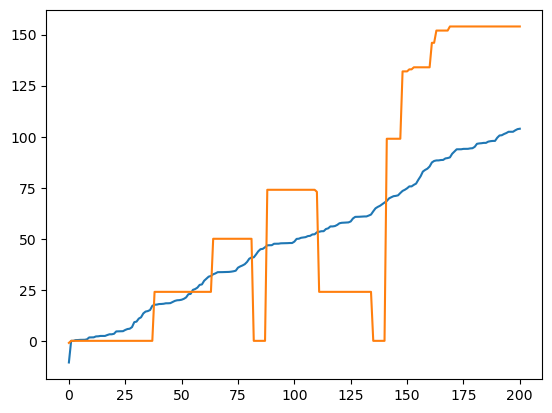

In [44]:
plt.plot(Q)
plt.plot(CP)


In [43]:
df

,0,squared,cumsum,cumsumsquared,diviseur,mean,meansquared
0,0.263015,0.069177,0.263015,0.069177,1,0.263015,0.069177
1,0.407639,0.166170,0.670654,0.235347,2,0.335327,0.112444
2,1.066141,1.136656,1.736795,1.372002,3,0.578932,0.335162
3,0.381487,0.145533,2.118282,1.517535,4,0.529571,0.280445
4,0.857824,0.735862,2.976106,2.253397,5,0.595221,0.354288
...,...,...,...,...,...,...,...
196,3.870863,14.983580,221.083486,741.923160,197,1.122251,1.259448
197,4.605675,21.212239,225.689161,763.135398,198,1.139844,1.299245
198,4.535785,20.573346,230.224946,783.708744,199,1.156909,1.338439
199,4.236422,17.947275,234.461368,801.656020,200,1.172307,1.374303


In [45]:
plot(backtracking(CP))

[23, 133, 153]

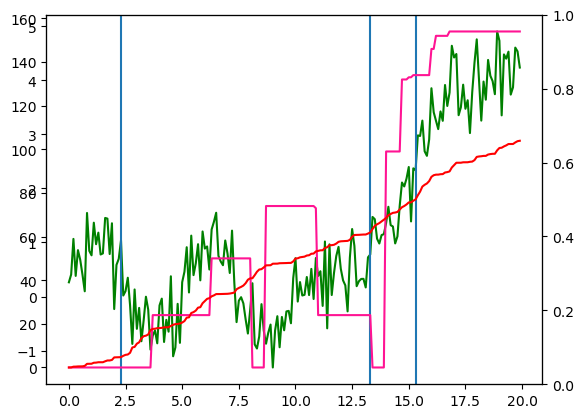

In [57]:

fig, ax1 = plt.subplots()
ax1.plot(x, y, color='green')
for lim in backtracking(CP):
    plt.axvline(x=x[lim])

ax2 = ax1.twinx()
ax2.plot(x, CP[1:], color='deeppink')
ax3 = ax2.twinx()
ax2.plot(x, Q[1:], color='red')

plt.show()

In [55]:
len(CP)

201

In [58]:
CP

[-1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 0,
 0,
 0,
 0,
 0,
 0,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 132,
 132,
 132,
 133,
 133,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 134,
 146,
 146,
 152,
 152,
 152,
 152,
 152,
 152,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 15